# Comparing to AutoML in TensorFlow (AutoKeras)
This is part 2 of our investigation into when to use which types of arcitectures for automatically implementing an architecutre model with the cifar10 dataset. AutoML by nature has exteremely long training durations (often can take as much time as you allow it), so our investigation here could be more thurough again with a GPU or if we had the dedication to be running these homeworks independently for multiple days. However, below is a thurough implementation of autokeras and helps us answer our questions we want to answer with this investigation. 
2. How effective is TensorFlow's AutoML feature (autokeras) relative to implementing the well-recognized architectures?
3. In what case would we use these pre-established neural architectures, AutoKeras, or our own convolutional NN as we have been doing in previous weeks of the class (interestingly enough we did find an example where AutoML was less effective than the author implementing their own architecture https://www.pyimagesearch.com/2019/01/07/auto-keras-and-automl-a-getting-started-guide/)?

In [1]:
import tensorflow as tf
from tensorflow import keras
import autokeras as ak #AutoML for Tensorflow/Keras
from tensorflow.keras.utils import normalize, to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape)

(50000, 32, 32, 3)


Trial 1 Complete [00h 00m 59s]
val_loss: 1.022807627916336

Best val_loss So Far: 0.03724231570959091
Total elapsed time: 00h 00m 59s
INFO:tensorflow:Oracle triggered exit
Epoch 1/40
32/32 [==============================] - 2s 45ms/step - loss: 2.2384 - accuracy: 0.1790
Epoch 2/40
32/32 [==============================] - 1s 46ms/step - loss: 1.9308 - accuracy: 0.3120
Epoch 3/40
32/32 [==============================] - 1s 44ms/step - loss: 1.6655 - accuracy: 0.4250
Epoch 4/40
32/32 [==============================] - 1s 41ms/step - loss: 1.4202 - accuracy: 0.5310
Epoch 5/40
32/32 [==============================] - 1s 44ms/step - loss: 1.2364 - accuracy: 0.5620
Epoch 6/40
32/32 [==============================] - 1s 44ms/step - loss: 1.0602 - accuracy: 0.6350
Epoch 7/40
32/32 [==============================] - 1s 43ms/step - loss: 0.9150 - accuracy: 0.6970
Epoch 8/40
32/32 [==============================] - 1s 43ms/step - loss: 0.8611 - accuracy: 0.7050
Epoch 9/40
32/32 [==================

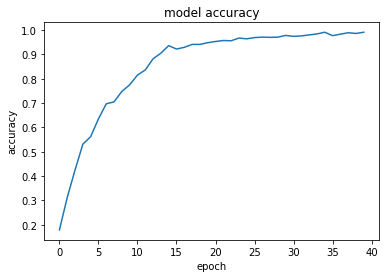

In [3]:
#Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=49000, random_state=42)

print(X_train.shape) 
print(y_train.shape)  


X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

clf = ak.ImageClassifier(max_trials=40) 
history=clf.fit(X_train, y_train, epochs=40)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Above are the training results for the test case that the autokeras has decided is the best model within our given restrictions. As you can see the training accuracy started low and has gotten very high within the 40 epochs, however as we see below this obviously won't guarentee accurate performance with the testing dataset. Below we will also output more details about the model this has created for further evaluation and conjecture.

1532/1532 [==============================] - 27s 15ms/step - loss: 3.4562 - accuracy: 0.4157
Accuracy =  41.56530499458313 %
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 32, 32, 3)         0         
_________________________________________________________________
normalization (Normalization (None, 32, 32, 3)         7         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 64)          0         
__

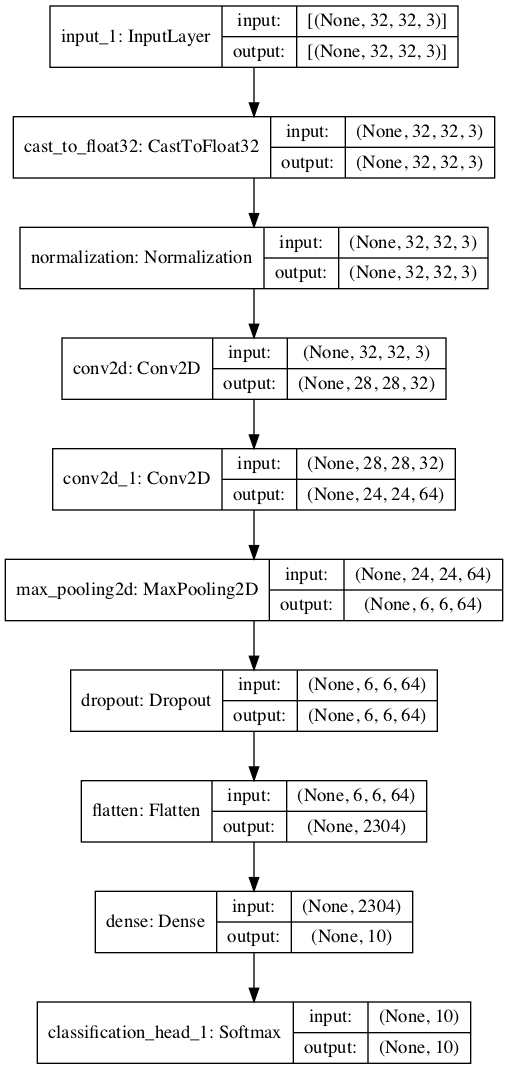

In [4]:

#Evaluate the classifier on test data
_, acc = clf.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

# get the final best performing model
model = clf.export_model()
print(model.summary())

#Save the model
model.save('cifar_model.h5')
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model.png')

After running this autokeras, we have performed with a test accuracy of just above 40%. This significantly worse than both pre-established architectures with weighting (VGG19 and ResNet50) as well as our own personal implementation that we have done in previous weeks. If we were give the autokeras less restriction and more time to run, the model would improve significantly, which presents us to a the case by case understanding of when this is appropriate. Autokeras is a very convenient way to develop a reasonably accurate model architecture if youre situation permits a very long initial training. If it does not, a credible and quicker implementation is to use the appropriate pre-established architecture. If you are willing to dive deeper into "thinking" and are willing to develop your own model, this may be the quickest overall implementation in terms of time until you have an operational architecutre model.